<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_predictionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the stock price movement of American Express.

* We are using the stock data for American Express from the year 1972 to 2020 and try to predict the closing price for the date... to date..

* Closing Price is the last price at which a stock trades during a regular trading session.

# Importing required libraries

In [119]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

# Data Exploration

In [120]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [121]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [122]:
# We take a look at the last rows of our dataset
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12059,2020-03-26,92.239998,99.690002,90.839996,93.290001,92.774651,9459400.0
12060,2020-03-27,87.940002,91.970001,85.820000,88.730003,88.239845,6999800.0
12061,2020-03-30,88.510002,91.389999,85.269997,90.269997,89.771332,5565000.0
12062,2020-03-31,89.940002,90.900002,85.070000,85.610001,85.137077,6075900.0
12063,2020-04-01,80.650002,81.309998,77.000000,77.839996,77.409996,8307600.0


In [123]:
# We check the datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [124]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df.pop("Date")

In [125]:
df = df[["Close"]]

In [126]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [127]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


# Data Visualization

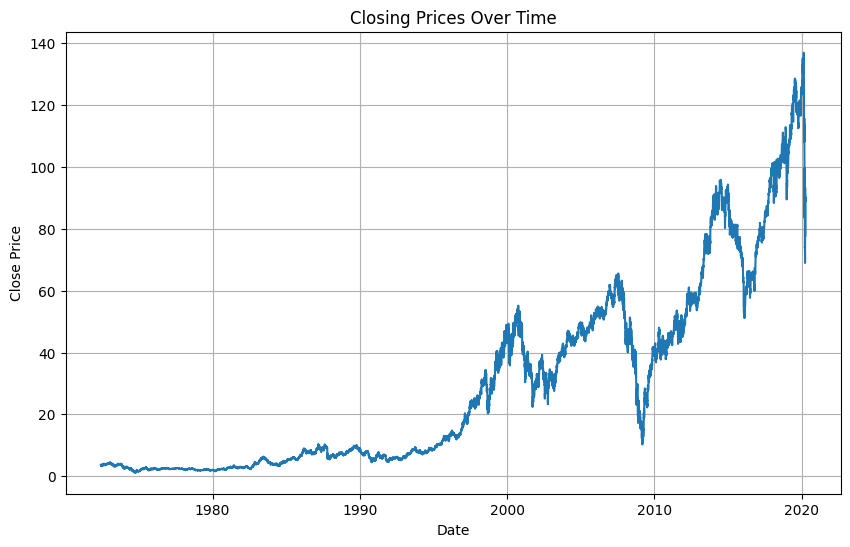

In [128]:
#Visualizing the closing price from 1972 until 2020
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Data Preparation

###Normalizing and Spliting the data to Training and Test data
####Importing MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and

In [129]:
#For preprocessing
from sklearn.preprocessing import MinMaxScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse

In [130]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.65639501],
       [0.62207872],
       [0.56486027]])

In [131]:
# To see the scaled data in a DF format, we create a new DF using the scaled values.
#Create a new DataFrame with the scaled values and original dates in the index
scaled_df = pd.DataFrame(df1, index = df.index, columns = ["Scaled_Close"])
scaled_df.head()

,Scaled_Close
Date,
1972-06-01,0.018843
1972-06-02,0.018724
1972-06-05,0.018191
1972-06-06,0.016769
1972-06-07,0.016473


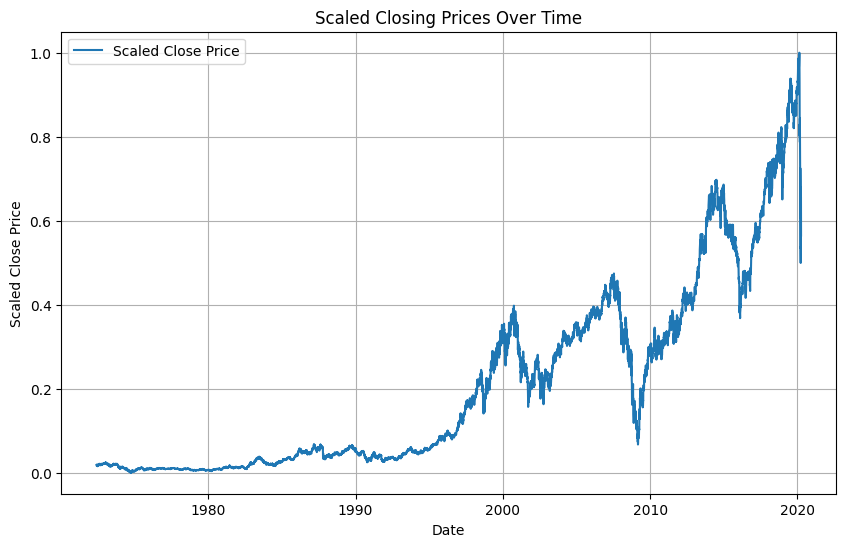

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_df.index, scaled_df["Scaled_Close"], label="Scaled Close Price")
plt.title('Scaled Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
#splitting dataset into train and test split. We us 80%/20% for Training and Test sets
training_size = int(len(df1)*0.8)
test_size = len(df1)-training_size

# train_data contains the first training_size rows of the scaled data, and test_data contains the remaining rows.
train_data,test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [134]:
print ("Training Size: ", training_size)
print ("Training Size: ", test_size)

Training Size:  9651
Training Size:  2413


In [135]:
#Checking the  length (number of rows) in our training and test set


print("Length of Training Data:", len(train_data))
print("Length of Test Data:", len(test_data))


Length of Training Data: 9651
Length of Test Data: 2413


In [136]:
train_data

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.28421762],
       [0.29290716],
       [0.28539586]])

	for i in range(len(stock_data)-time_step-1):  
		X.append(stock_data[i:(i+time_step), 0])  ###i=0, 0,1,2,3-----99   100
		Y.append(stock_data[i + time_step, 0])

In [137]:
# Convert the data to numpy array and set the timestep to 100

# convert an array of values into a dataset matrix
def create_AR(stock_data, time_step=1):
	X, Y = [], []
	for i in range(time_step, len(stock_data)):
		a = stock_data[i-time_step:i, 0]   ###i=0, 0,1,2,3-----99   100
		X.append(a)
		Y.append(stock_data[i,0])
	return np.array(X), np.array(Y)

In [138]:
time_step = 100
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
X_train, y_train = create_AR(train_data, time_step)
X_test, y_test = create_AR(test_data, time_step)

In [139]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (9551, 100)
Shape of y_train: (9551,)


In [140]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (2313, 100)
Shape of y_test: (2313,)


In [141]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Build the Model
* Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

Should we add an Input layer and another Dense layer with the activation "Relu" and see if our pred gets better ? @ Sonam

model = Sequential([layers.Input(()),
                    layers.LSTM(64),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(1)]
model.compile(loss="mse", optimizer = Adam(learning_rate=0.001), metrics=["mean_absolute_error"])



In [142]:
#Model

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["mean_absolute_error"])

modelresult = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100, batch_size=64,verbose=1)


Epoch 1/100
150/150 [==============================] - 10s 24ms/step - loss: 0.0015 - mean_absolute_error: 0.0196 - val_loss: 0.0032 - val_mean_absolute_error: 0.0430
Epoch 2/100
150/150 [==============================] - 2s 15ms/step - loss: 3.7221e-04 - mean_absolute_error: 0.0114 - val_loss: 0.0021 - val_mean_absolute_error: 0.0352
Epoch 3/100
150/150 [==============================] - 2s 14ms/step - loss: 3.1225e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0016 - val_mean_absolute_error: 0.0291
Epoch 4/100
150/150 [==============================] - 2s 15ms/step - loss: 2.8324e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0011 - val_mean_absolute_error: 0.0232
Epoch 5/100
150/150 [==============================] - 2s 16ms/step - loss: 2.9515e-04 - mean_absolute_error: 0.0108 - val_loss: 9.2149e-04 - val_mean_absolute_error: 0.0212
Epoch 6/100
150/150 [==============================] - 3s 20ms/step - loss: 2.5318e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0010 - val_mean_ab

In [143]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

# Model Evaluation

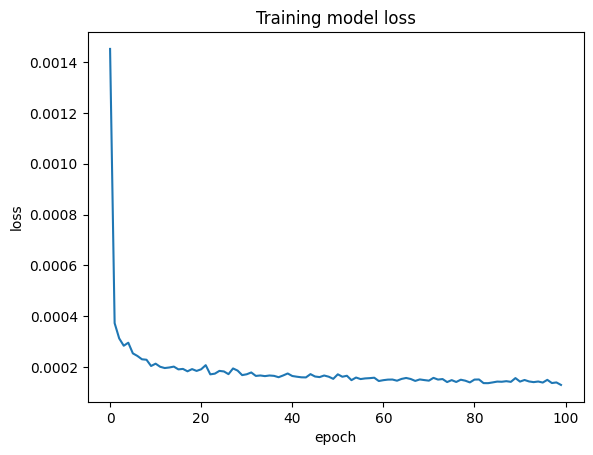

In [144]:
plt.plot(modelresult.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [145]:
train_pred = model.predict(X_train)

#predicted stock price
test_pred = model.predict(X_test)

73/73 [==============================] - 0s 5ms/step


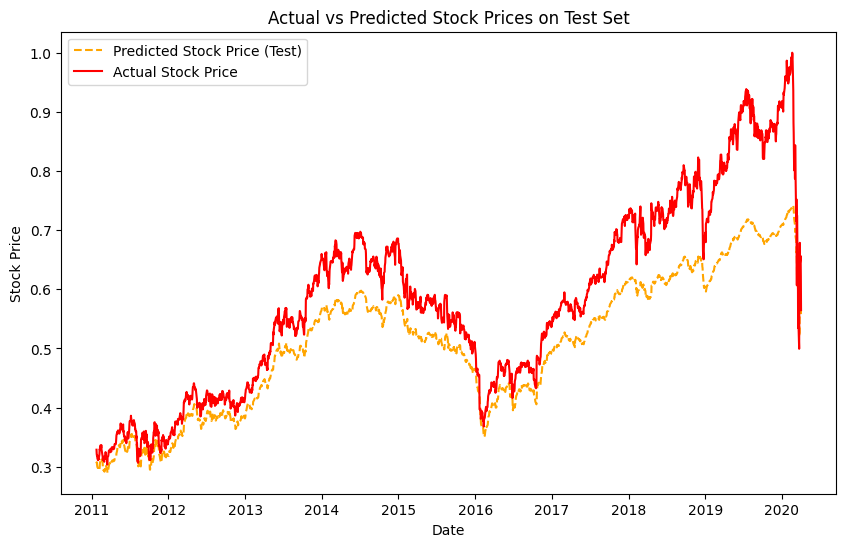

In [146]:
# Assuming you have a DataFrame df with a "Date" column
plt.figure(figsize=(10, 6))

plt.plot(df.index[-len(test_pred):], test_pred, label="Predicted Stock Price (Test)", linestyle='--', color='orange')
plt.plot(df.index[-len(y_test):], y_test, label="Actual Stock Price", linestyle='-', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices on Test Set')
plt.legend()
plt.show()


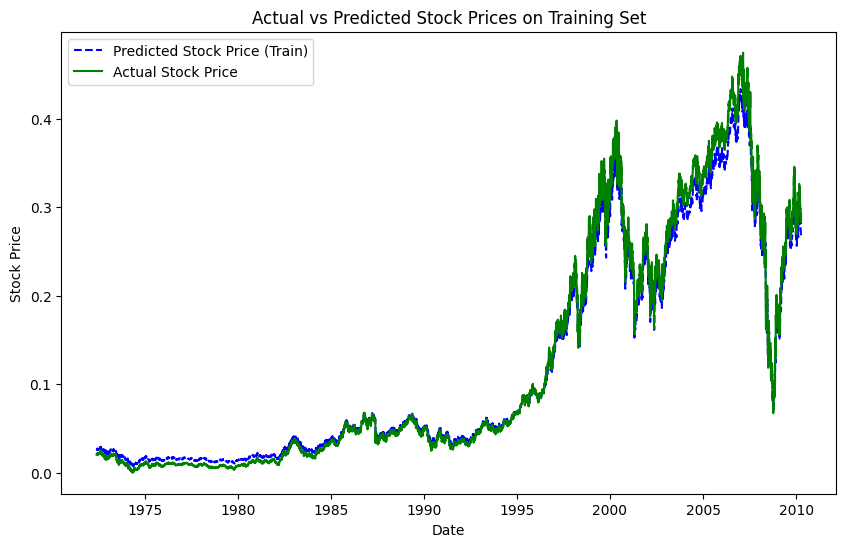

In [147]:
# Assuming you have a DataFrame df with a datetime index
plt.figure(figsize=(10, 6))

plt.plot(df.index[:len(train_pred)], train_pred, label="Predicted Stock Price (Train)", linestyle='--', color='blue')
plt.plot(df.index[:len(y_train)], y_train, label="Actual Stock Price", linestyle='-', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices on Training Set')
plt.legend()
plt.show()



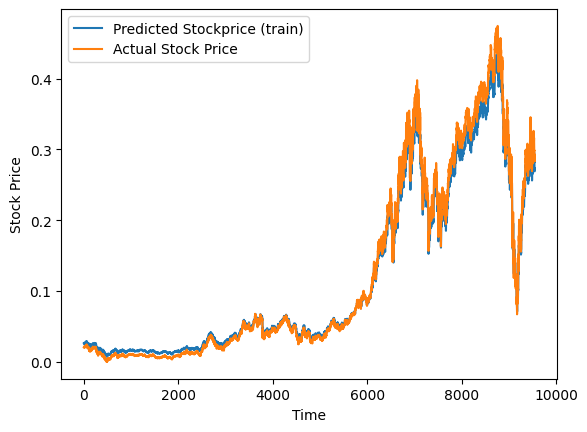

In [148]:
#Visualize actual stockprice and predicted strockprice (train)
plt.plot(train_pred)
plt.plot(y_train)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(["Predicted Stockprice (train)", "Actual Stock Price"])

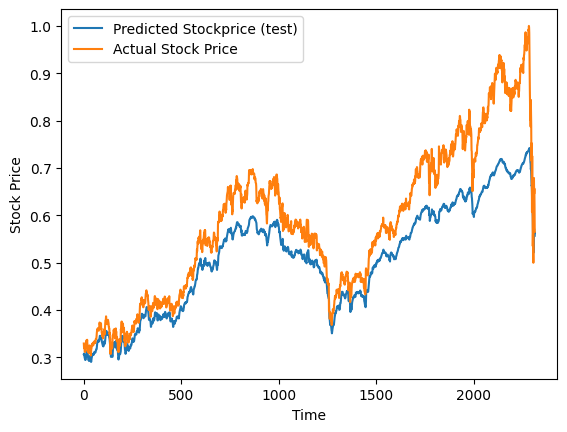

In [149]:
#Visualize actual stockprice and predicted strockprice (test)
plt.plot(test_pred)
plt.plot(y_test)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(["Predicted Stockprice (test)", "Actual Stock Price"])

In [150]:
#We have to do an inverse transform (before we concatenate array with 0)
train_pred = np.c_[train_pred, np.zeros(train_pred.shape)]
test_pred = np.c_[test_pred, np.zeros(test_pred.shape)]

In [151]:
#invert prediction
train_pred = scaler.inverse_transform(train_pred)
train_pred = [x[0] for x in train_pred]
test_pred = scaler.inverse_transform(test_pred)
test_pred = [x[0] for x in test_pred]

In [152]:
print(train_pred[:5])
print(test_pred[:5])

[4.7176765567642756, 4.72345165413572, 4.6999020454430545, 4.672664589883025, 4.655219910682177]
[42.71130257061163, 42.91010432826926, 42.513435674546706, 42.01757456351924, 41.83771690592869]


In [153]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

trainScore = mean_squared_error ([x[0][0] for x in X_train], train_pred, squared=False)
print("Train Score: %.2f" % (trainScore))

testScore = mean_squared_error ([x[0][0] for x in X_test], test_pred, squared=False)
print("Train Score: %.2f" % (testScore))

Train Score: 23.49
Train Score: 71.44


In [154]:
import math
from sklearn.metrics import mean_squared_error

trainScore = mean_squared_error([x[0][0] for x in X_train], train_pred, squared=False)
print("Train Score: %.2f" % trainScore)

testScore = mean_squared_error([x[0][0] for x in X_test], test_pred, squared=False)
print("Test Score: %.2f" % testScore)


Train Score: 23.49
Test Score: 71.44


In [155]:
#Alternetively:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

23.48065251436143

In [156]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_pred))

71.41099206963608

In [157]:
#another option to inverse transform -> @Sonam: lets check together which method is better
#train_pred = train_pred.reshape(-1,1)
#test_pred = test_pred.reshape(-1,1)

##Transformback to original form
#train_pred=scaler.inverse_transform(train_pred)
#test_pred=scaler.inverse_transform(test_pred)

AttributeError: ignored

In [158]:
# Reshape predictions
#train_pred = train_pred.reshape(-1, 1)
#test_pred = test_pred.reshape(-1, 1)

# Inverse transform using MinMaxScaler
#train_pred = scaler.inverse_transform(train_pred)
#test_pred = scaler.inverse_transform(test_pred)


AttributeError: ignored

In [159]:
import numpy as np

# Convert lists to NumPy arrays
train_pred = np.array(train_pred)
test_pred = np.array(test_pred)

# Reshape predictions
train_pred = train_pred.reshape(-1, 1)
test_pred = test_pred.reshape(-1, 1)

# Inverse transform using MinMaxScaler
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)


In [160]:
test_pred

array([[ 5801.13523838],
       [ 5828.1316132 ],
       [ 5774.26581351],
       ...,
       [10493.45338831],
       [10555.68194752],
       [10418.66392804]])

In [161]:
len(test_data)

2413

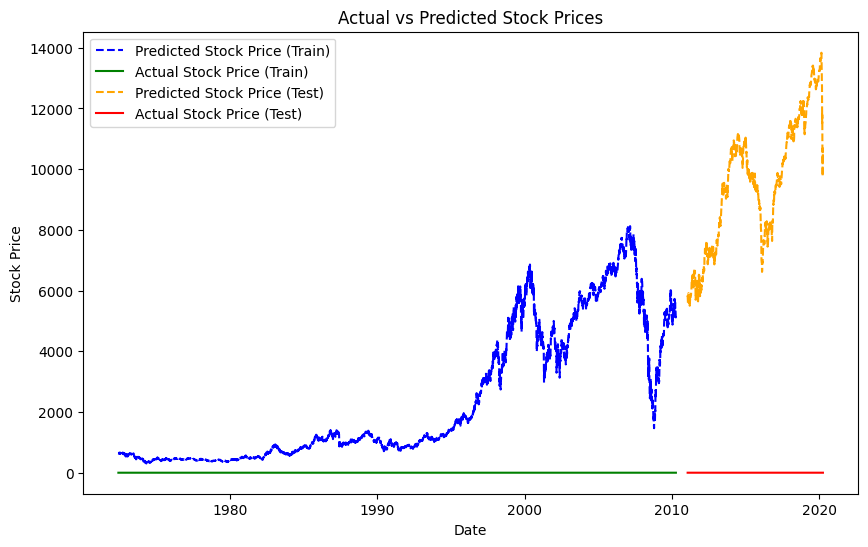

In [162]:
# Next steps:
# Visualize Predictions: Plot the actual vs. predicted stock prices to visually inspect how well the model performs on both the training and test sets.

import matplotlib.pyplot as plt

# Assuming df contains the original DataFrame with dates
plt.figure(figsize=(10, 6))

# Plotting for the training set
plt.plot(df.index[:len(train_pred)], train_pred, label="Predicted Stock Price (Train)", linestyle='--', color='blue')
plt.plot(df.index[:len(y_train)], y_train, label="Actual Stock Price (Train)", linestyle='-', color='green')

# Plotting for the test set
plt.plot(df.index[-len(test_pred):], test_pred, label="Predicted Stock Price (Test)", linestyle='--', color='orange')
plt.plot(df.index[-len(y_test):], y_test, label="Actual Stock Price (Test)", linestyle='-', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


In [163]:
# Evaluate Performance metrics
# Calculate and print additional performance metrics such as RMSE, Mean Absolute Error (MAE), or others, depending on your preference.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("Train RMSE: %.2f" % train_rmse)
print("Test RMSE: %.2f" % test_rmse)
print("Train MAE: %.2f" % train_mae)
print("Test MAE: %.2f" % test_mae)


Train RMSE: 3213.41
Test RMSE: 9779.58
Train MAE: 2330.64
Test MAE: 9547.71


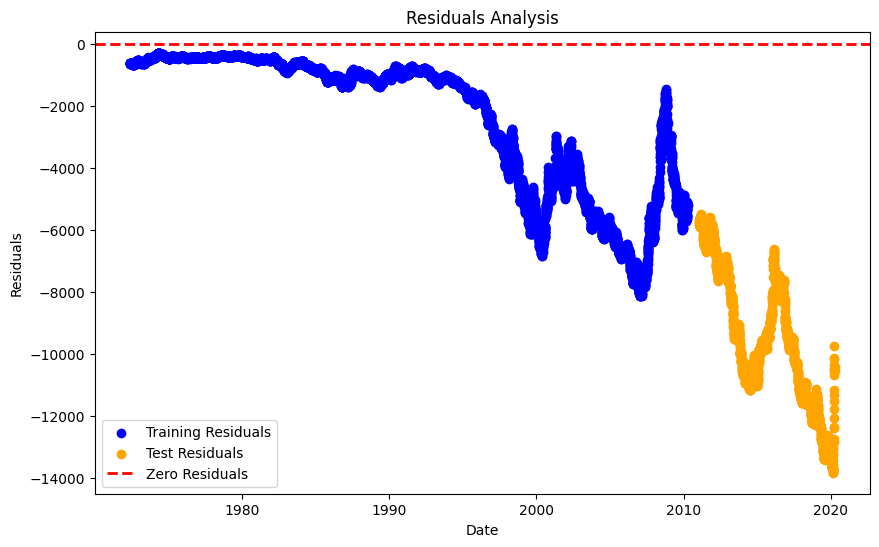

In [164]:
# Inspect Residuals:
# Analyze the residuals (the differences between actual and predicted values) to understand if there are patterns or trends that the model might have missed.

train_residuals = y_train - train_pred.flatten()
test_residuals = y_test - test_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(df.index[:len(train_residuals)], train_residuals, label="Training Residuals", color='blue')
plt.scatter(df.index[-len(test_residuals):], test_residuals, label="Test Residuals", color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.legend()
plt.show()

